<a href="https://colab.research.google.com/github/202248SD/5DayGitChallenge/blob/main/MARSFLAG_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [1]:
!unzip /content/犬１-20240617T025624Z-001.zip

unzip:  cannot find or open /content/犬１-20240617T025624Z-001.zip, /content/犬１-20240617T025624Z-001.zip.zip or /content/犬１-20240617T025624Z-001.zip.ZIP.


In [2]:
!unzip /content/犬２-20240617T025639Z-001.zip

Archive:  /content/犬２-20240617T025639Z-001.zip
  inflating: 犬２/IMG_6909.JPG     
  inflating: 犬２/IMG_6886.JPG     
  inflating: 犬２/IMG_6888.JPG     
  inflating: 犬２/IMG_6911.JPG     
  inflating: 犬２/IMG_6882.JPG     
  inflating: 犬２/IMG_6887.JPG     
  inflating: 犬２/IMG_6908.JPG     
  inflating: 犬２/IMG_6881.JPG     
  inflating: 犬２/IMG_6896.JPG     
  inflating: 犬２/IMG_6889.JPG     
  inflating: 犬２/IMG_6891.JPG     
  inflating: 犬２/IMG_6905.JPG     
  inflating: 犬２/IMG_6899.JPG     
  inflating: 犬２/IMG_6880.JPG     
  inflating: 犬２/IMG_6885.JPG     
  inflating: 犬２/IMG_6890.JPG     
  inflating: 犬２/IMG_6879.JPG     
  inflating: 犬２/IMG_6877.JPG     
  inflating: 犬２/IMG_6883.JPG     
  inflating: 犬２/IMG_6907.JPG     
  inflating: 犬２/IMG_6876.JPG     
  inflating: 犬２/IMG_6913.JPG     
  inflating: 犬２/IMG_6912.JPG     
  inflating: 犬２/IMG_6904.JPG     
  inflating: 犬２/IMG_6892.JPG     
  inflating: 犬２/IMG_6898.JPG     
  inflating: 犬２/IMG_6900.JPG     
  inflating: 犬２/IMG_6871.JPG     
 

In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip -O /content/dogImages.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip -O /content/lfw.zip

--2024-06-17 08:42:11--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.168, 52.219.113.0, 52.219.220.216, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘/content/dogImages.zip’

/content/dogImages. 100%[===================>]   1.05G  49.1MB/s    in 23s     

2024-06-17 08:42:35 (46.9 MB/s) - ‘/content/dogImages.zip’ saved [1132023110/1132023110]

--2024-06-17 08:42:35--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.48, 52.219.220.96, 52.219.121.112, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509

In [3]:
!unzip /content/dogImages.zip
!unzip /content/lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0002.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney 

In [4]:
import numpy as np
from glob import glob

human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


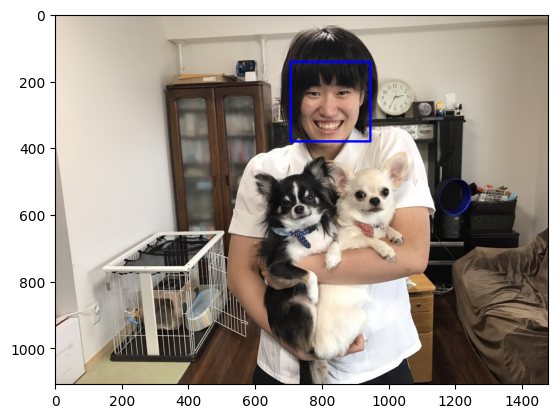

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# Load the cascade classifier for frontal face detection
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Example usage:
test_path = '/content/犬１/IMG_1796.JPG'
test_img = cv.imread(test_path)
gray = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray)

for (x, y, w, h) in faces:
    cv.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv_rgb = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

In [8]:
def face_detector(img_path):
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [9]:
print(face_detector(test_path))
print(face_detector('/content/犬１/IMG_5789.JPG')) # this img only has dogs, so face_detector() --> False

True
False


In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')

device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu") # set device
print(f"Using device: {device}")
VGG16 = VGG16.to(device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 133MB/s]


Using device: cpu


In [11]:
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import requests
from io import BytesIO
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_image(img_path, max_size=400, shape=None):

    if "http" in img_path: # if path is url
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')

    transform = transforms.Compose([
                        transforms.Resize((224,224),1),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406),
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = transform(image)[:3,:,:].unsqueeze(0)

    return image

def VGG16_predict(img_path):

    image = load_image(img_path).to(device)

    output = VGG16(image)

    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if device == 'cpu' else np.squeeze(preds_tensor.cpu().numpy())
    return preds

print(VGG16_predict('/content/犬１/IMG_1796.JPG'))

test_img = load_image(test_path).to(device)
print(VGG16(test_img).shape) # 1000 classes

151
torch.Size([1, 1000])


In [12]:
def dog_detector(img_path):
    pred_idx = VGG16_predict(img_path)
    if (151 <= pred_idx and pred_idx <=268): # idx 151 - 268 are dogs for VGG16 outputs
        return True
    return False

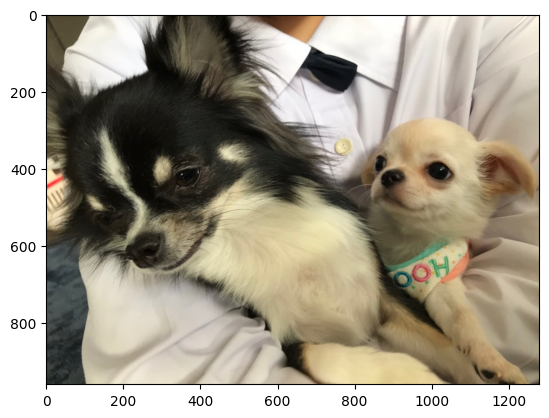

In [13]:
test_path = '/content/犬１/IMG_0606.JPG'
test_img = cv.imread(test_path)
cv_rgb = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
plt.imshow(cv_rgb)

In [14]:
dog_detector(test_path), face_detector(test_path)

(True, False)

In [15]:
import os
from torchvision import datasets

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [16]:
print(dog_files)
tr, te, va = 0, 0, 0
for file_path in dog_files:
  if 'test' in file_path:
    te += 1
  elif 'train' in file_path:
    tr += 1
  elif 'valid' in file_path:
    va += 1
print(f'Train: {tr}, Test: {te}, Valid: {va}')

['dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04910.jpg'
 'dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04961.jpg'
 'dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04912.jpg'
 ... 'dogImages/valid/003.Airedale_terrier/Airedale_terrier_00206.jpg'
 'dogImages/valid/003.Airedale_terrier/Airedale_terrier_00160.jpg'
 'dogImages/valid/003.Airedale_terrier/Airedale_terrier_00182.jpg']
Train: 6680, Test: 836, Valid: 835


In [17]:
from torch.utils.data import Dataset

class DogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

        self.images = []
        self.labels = []

        for i, cls in enumerate(self.classes):
            class_path = os.path.join(root_dir, cls)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.images.append(img_path)
                self.labels.append(i+1)  # Assigning index based on sorted order of classes

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = self.images[index]
        label = self.labels[index]

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

In [18]:
from torch.utils.data import DataLoader

train_dataset = DogDataset('dogImages/train', transform=train_transform)
test_dataset = DogDataset('dogImages/test', transform=test_transform)
valid_dataset = DogDataset('dogImages/valid', transform=test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

In [19]:
for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    print(y)
    break

Shape of X [N, C, H, W]: torch.Size([16, 3, 224, 224])
Shape of y: torch.Size([16]) torch.int64
tensor([ 17,  95,  16, 120,  84,  90,  45,   4,  26, 119,  24,  17,  44,  48,
        111,  72])


In [20]:
import torchvision.models as models
import torch.nn as nn

model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')

model.eval()

for param in model.features.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, 133)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu") # set device
print(f"Using device: {device}")
model = model.to(device)

Using device: cpu


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [26]:
def test_model(dataloader, model, loss_fn):
  model.eval()
  total_preds = 0
  correct_preds = 0
  total_loss = 0

  with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            out = model(X)
            _, preds = torch.max(out, 1)
            total_preds += preds.size(0)
            correct_preds += (preds == y).sum().item()
            loss = loss_fn(out, y)
            total_loss += loss

        print(f"Test Data: avg_loss = {loss.item()/total_preds:.4f}, accuracy = {correct_preds/total_preds:.4f}")

In [27]:
test_model(test_dataloader, model, criterion)

KeyboardInterrupt: 

In [ ]:
def train_model(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader)

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forwardprop
        out = model(X)

        loss = loss_fn(out, y)

        # Backprop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss = loss.item()
            print(f"loss: {loss:>7f}  [{batch:>5d}/{size:>5d}]")

    return model

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model = train_model(train_dataloader, model, criterion, optimizer)
    test_model(test_dataloader, model, criterion)

In [ ]:
torch.save(model.state_dict(), 'model_param.pth')